In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


The zip file is on the drive.
Unzip it to colab workspace


In [2]:
!unzip '/content/drive/My Drive/CV/compv.zip'

Archive:  /content/drive/My Drive/CV/compv.zip
  inflating: CV/samplesubmission.csv  
  inflating: CV/submission.csv       
   creating: CV/test/
 extracting: CV/test/C1_thinF_IMG_20150604_104722_cell_191.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104722_cell_242.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104722_cell_248.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104722_cell_60.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104722_cell_81.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104722_cell_9.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104919_cell_163.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104919_cell_164.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104919_cell_82.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104942_cell_139.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104942_cell_269.png  
 extracting: CV/test/C1_thinF_IMG_20150604_104942_cell_4.png  
 extracting: CV/test/C1_thinF_IMG_20150604_105100_cell_157.png  
 extracting: CV/

In [0]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline 


% *special derivatives called 'magics'*

In [0]:
from fastai import *
from fastai.vision import *

In [0]:

path=Path("/content/CV/train")

In [0]:
np.random.seed(2)
data = ImageDataBunch.from_folder( path, train='.',
              valid_pct=0.2, size=224, ds_tfms=get_transforms())

create databunch of data-- creates training  and validation dataset. Here we are not given a separate validation set so we randomly(in theory-- however here we seed the random func for reproducibility) set 20 percent of the training dataset as the validation datset. 

Data Augmentation--
tfms-- get_transforms()-- default values that work well in a large range of tasks-- tfms are applied only to the training data for the model to generalize better.A bit of rotation, zoom, translation,  that don't change what's inside the image but do change its pixel values.



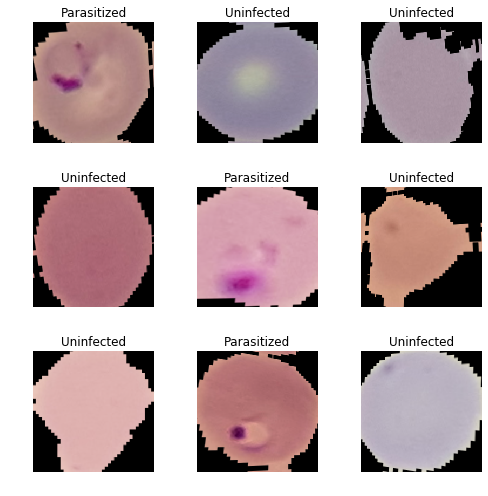

In [20]:
data.show_batch(rows=3,figsize=(7,7))

In [21]:
data.classes

['Parasitized', 'Uninfected']

In [0]:
data.c

2

In [7]:
learn=create_cnn(data,models.resnet34,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 62850094.67it/s]


create a convolutional neural network on the resnet34 architecture(having 34 layers), on the databunch data

metrics-- printed out while training model-- we print the error_rate

In [8]:
learn.fit_one_cycle(4) #has a default lr=1e-3, trains only the lowermost layers of the architecture over a range of values with 1e-3 being max

epoch,train_loss,valid_loss,error_rate,time
0,0.242966,0.171136,0.064250,02:06
1,0.183601,0.137729,0.050500,02:08
2,0.159828,0.130421,0.048500,02:08
3,0.144626,0.127320,0.048250,02:08


In [0]:
learn.save('stage1')

In [12]:
from shutil import copyfile

copyfile(path/'models/stage1.pth', '/content/drive/My Drive/CV/stage1.pth')

'/content/drive/My Drive/CV/stage1.pth'

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

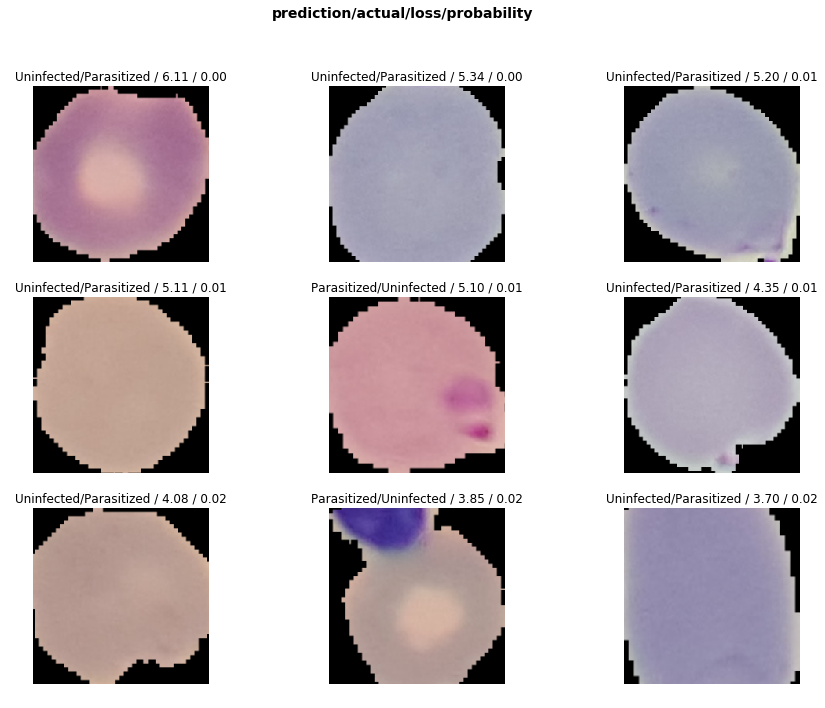

In [0]:
interp.plot_top_losses(9,figsize=(15,11),heatmap=False) #wrong predictions with calculated probability of that label

In [0]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [0]:
learn.unfreeze() #we wanna train all layers specific to our model now

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2,max_lr=slice(3e-05,3e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.144382,0.114677,0.042000,02:14
1,0.115582,0.096864,0.036000,02:13


In [0]:
learn.save('stage2')

In [19]:
copyfile(path/'models/stage2.pth', '/content/drive/My Drive/CV/stage2.pth')

'/content/drive/My Drive/CV/stage2.pth'

In [0]:
learn.fit_one_cycle(2,max_lr=slice(3e-05,3e-04))

In [0]:
learn.load('stage2')# previous step had error rate increasing so

In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


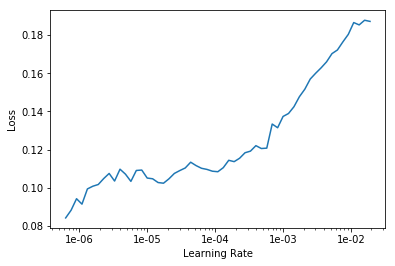

In [0]:
learn.recorder.plot()

In [20]:
learn.load('stage2')
learn.fit_one_cycle(1,max_lr=slice(3e-05,3e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.121696,0.098695,0.038750,02:13


In [0]:
learn.save("stage3")

In [22]:
copyfile(path/'models/stage3.pth', '/content/drive/My Drive/CV/stage3.pth')

'/content/drive/My Drive/CV/stage3.pth'

In [0]:
learn.load('stage3')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

In [0]:
learn.export()

In [0]:
learn=load_learner('CV/train')

In [0]:
regfile=re.compile(r"\d+,(\w+.png),")

In [0]:
sub=open('/content/drive/My Drive/CV/res.txt','a+')

In [0]:
files=get_image_files('/content/CV/test') #returns a list of all abs file paths in folder

In [0]:
files

In [43]:
import os
os.path.basename(files[0])

'C137P98ThinF_IMG_20151005_161449_cell_8.png'

In [45]:
files[0]

PosixPath('/content/CV/test/C137P98ThinF_IMG_20151005_161449_cell_8.png')

In [0]:

for img in files:
  image=open_image(img)
  pred_class,pred_idx,outputs=learn.predict(image)
  val="0"
  if str(pred_class)=='Uninfected':
    val=1
  
  sub.write(os.path.basename(img)+","+str(val))



for every file in the test folder predict label and write to the submission file on the drive

In [0]:
sub.close()